[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) is the observation that, in many documents containing natural language, the frequency of any word is inversely proportional to the rank of its frequency:

$$\text{rank} \propto \frac{1}{\text{frequency}}.$$

In other words,

$$\log(\text{rank}) = C - \log(\text{frequency}).$$

Let's test this using text analysis and the Harry Potter books.

In [9]:
library(tidyverse)
library(harrypotter)
phil <- tibble(chapter=seq_along(philosophers_stone), text=philosophers_stone) %>% print

# A tibble: 17 x 2
   chapter text                                                                 
     <int> <chr>                                                                
 1       1 "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Dri…
 2       2 "THE VANISHING GLASS　　Nearly ten years had passed since the Dursleys…
 3       3 "THE LETTERS FROM NO ONE　　The escape of the Brazilian boa constricto…
 4       4 "THE KEEPER OF THE KEYS　　BOOM. They knocked again. Dudley jerked awa…
 5       5 "DIAGON ALLEY　　Harry woke early the next morning. Although he could …
 6       6 "THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS　　Harry's last mon…
 7       7 "THE SORTING HAT　　The door swung open at once. A tall, black-haired …
 8       8 "THE POTIONS MASTER　　There, look.\"　　\"Where?\"　　\"Next to the tall …
 9       9 "THE MIDNIGHT DUEL　　Harry had never believed he would meet a boy he …
10      10 "HALLOWEEN　　Malfoy couldn't believe his eyes when he saw that Harry …
11      1

In [12]:
library(tidytext)
phil_tok <- unnest_tokens(phil, input=text, output=word) %>% print

# A tibble: 77,875 x 2
   chapter word   
     <int> <chr>  
 1       1 the    
 2       1 boy    
 3       1 who    
 4       1 lived  
 5       1 mr     
 6       1 and    
 7       1 mrs    
 8       1 dursley
 9       1 of     
10       1 number 
# … with 77,865 more rows


In [17]:
phil_counts <- count(phil_tok, chapter, word, sort=T) %>% print

# A tibble: 20,504 x 3
   chapter word      n
     <int> <chr> <int>
 1      16 the     313
 2       6 the     282
 3       5 the     274
 4      10 the     256
 5       7 the     252
 6      12 the     250
 7       3 the     222
 8      15 the     219
 9      17 the     208
10       9 the     207
# … with 20,494 more rows


In [20]:
phil_counts <- group_by(phil_counts, chapter) %>% mutate(r = row_number(), f = n / sum(n)) %>% print

# A tibble: 20,504 x 5
# Groups:   chapter [17]
   chapter word      n     r      f
     <int> <chr> <int> <int>  <dbl>
 1      16 the     313     1 0.0487
 2       6 the     282     1 0.0447
 3       5 the     274     1 0.0414
 4      10 the     256     1 0.0596
 5       7 the     252     1 0.0561
 6      12 the     250     1 0.0455
 7       3 the     222     1 0.0576
 8      15 the     219     1 0.0429
 9      17 the     208     1 0.0379
10       9 the     207     1 0.0421
# … with 20,494 more rows


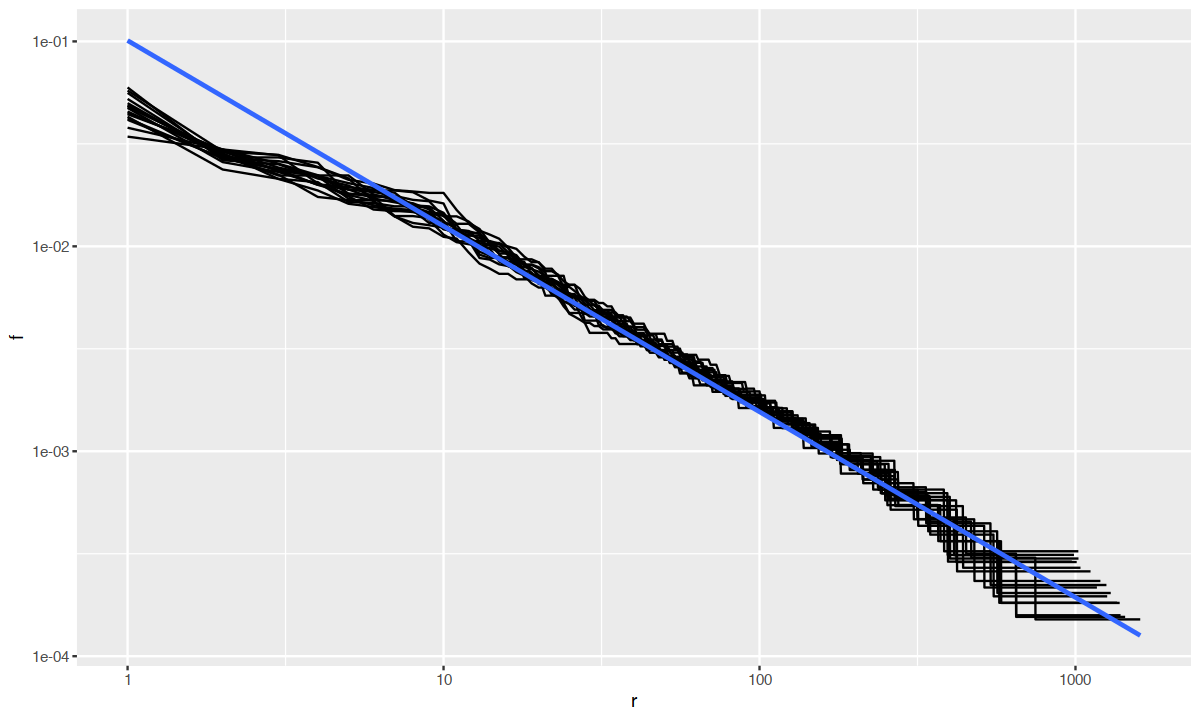

In [31]:
ggplot(phil_counts) + geom_line(aes(x=r, y=f, group=chapter)) + 
    scale_x_log10() + scale_y_log10() + geom_smooth(aes(x=r, y=f), method="lm")